In [1]:
# matplotlib 한글 깨짐방지
# 아래코드 실행후 '런타임 다시시작' 후 모듈 불러오기

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

In [3]:
np.set_printoptions(suppress = True)

In [4]:
plt.rc('font', family='NanumBarunGothic') # matplotlib 한글 깨짐 방지

# **1. 데이터 불러오기**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA 8기/OB/미니프로젝트(1)/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA 8기/OB/미니프로젝트(1)/data/test.csv')

In [7]:
train.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.472227,-1.756525,0.734336,9.126398,1,0,1,0,0,1,0,0
1,0.543313,-1.033082,-0.911192,9.052009,1,0,1,0,1,0,0,0
2,0.898745,-0.943687,-0.911192,10.207990,1,0,1,0,0,0,1,0
3,-0.025379,0.622393,3.202629,9.059265,1,0,1,0,0,0,1,0
4,1.040918,-1.504893,1.557100,9.431590,1,0,1,0,0,1,0,0


In [8]:
test.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.401140,-0.891539,0.734336,9095.06825,1,0,1,0,1,0,0,0
1,-0.238638,-0.089461,-0.911192,5272.17580,1,0,1,0,0,1,0,0
2,1.751782,-0.608453,-0.911192,29330.98315,1,0,0,1,0,1,0,0
3,0.472227,-0.797177,1.557100,9301.89355,0,1,1,0,0,1,0,0
4,-1.447107,0.225079,-0.911192,33750.29180,0,1,0,1,0,1,0,0


## **2. Feature, Target 분리**


In [9]:
X_train = train.drop(['charges'], axis = 1)
y_train = train['charges']

X_test = test.drop(['charges'], axis = 1)
y_test = test['charges']

# **3. 회귀 모델링**

## **3-1. 평가 지표**

**RMSE(Rooted Mean Square Error)**  
- 회귀 모델의 성능을 평가하는 지표 중 하나로, 예측된 값과 실제 값 사이의 오차를 측정
  - 오차를 제곱하여 평균을 구한 뒤 다시 제곱근을 취한 값으로 계산
- 수식  
  $RMSE = \sqrt{\frac{1}{N}\sum_{i=1}^{N}(y_i - \hat{y_i})^2}$  
  - N: 총 데이터 포인트의 개수
  - y_i: 실제 값(observed)
  - y_hat: 예측된 값(fitted)
- 예측 오차가 클수록 더 큰 패널티를 받음
  - RMSE가 작을수록 모델의 예측이 더 정확하다고 판단할 수 있음


In [10]:
from sklearn.metrics import mean_squared_error

## **3-2. 모델별 성능 확인을 위한 함수**

In [11]:
colors = [
    'khaki', 'teal', 'orchid', 'sandybrown', 'greenyellow', 'dodgerblue', 'rosybrown',
    'deeppink', 'salmon', 'olivedrab', 'olive', 'forestgreen',
    'royalblue', 'mediumpurple', 'gold', 'seagreen',
    'turquoise', 'steelblue', 'slategray', 'peru', 'slateblue', 'cadetblue',
    'lime', 'lavender', 'lightcoral', 'lightseagreen', 'lightskyblue', 'lightgreen',
    'lightpink', 'lightsalmon', 'lightsteelblue', 'lightyellow', 'palegreen',
]

In [12]:
## 회귀곡선 시각화
# 예측값, 실제값을 산점도로 표현

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(10, 8))
    plt.scatter(df.index, df['prediction'], marker='x', color='b')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

In [13]:
# 평가 지표 시각화

def model_eval(name_, pred, actual):
    global my_predictions
    global colors

    plot_predictions(name_, pred, actual)

    rmse = np.sqrt(mean_squared_error(pred, actual))
    my_predictions[name_] = rmse

    y_value = sorted(my_predictions.items(),key = lambda x: x[1],reverse = True) # 내림차순 정렬

    df = pd.DataFrame(y_value, columns = ['model','rmse'])

    # 상한, 하한 설정
    min_ = df['rmse'].min() - 10
    max_ = df['rmse'].max() + 10

    length = len(df)

    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['rmse'])

    for i, v in enumerate(df['rmse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')

    plt.title('RMSE Error', fontsize=18)
    plt.xlim(min_, max_)

    plt.show()

    print()
    print(df)

In [21]:
# 회귀 계수를 시각화하는 함수

def plot_coef(columns, coef):
  coef_df = pd.DataFrame(list(zip(columns, coef)))
  coef_df.columns=['feature', 'coef']
  coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)

  fig, ax = plt.subplots(figsize=(9, 7))
  ax.barh(np.arange(len(coef_df)), coef_df['coef'])
  idx = np.arange(len(coef_df))
  ax.set_yticks(idx)
  ax.set_yticklabels(coef_df['feature'])
  fig.tight_layout()
  plt.show()

# **4. 규제(Regularization)**
- 학습이 과대적합되는 것을 방지하고자 일종의 penalty를 부여하는 것
1. L1 규제
- 가중치의 합을 더한 값에 규제 강도를 곱하여 오차에 더한 값
- 어떤 가중치는 실제로 0이 됨 -> 모델에서 완전히 제외되는 특성이 발생할 수 있음
- 라쏘(Lasso) 모델에 적용됨



2. L2 규제
- 각 가중치 제곱의 합에 규제 강도를 곱한 값
- 규제 강도를 크게 하면 가중치가 더 많이 감소되고(규제를 중요시함), 규제 강도를 작게 하면 가중치가 증가함(규제를 중요시하지 않음)
- 릿지(Ridge) 모델에 적용됨

## **4-1. 라쏘(Lasso)**

In [15]:
from sklearn.linear_model import Lasso

In [16]:
alphas = [100,10,1,0.1,0.01,0.001,0.0001] # 규제 강도

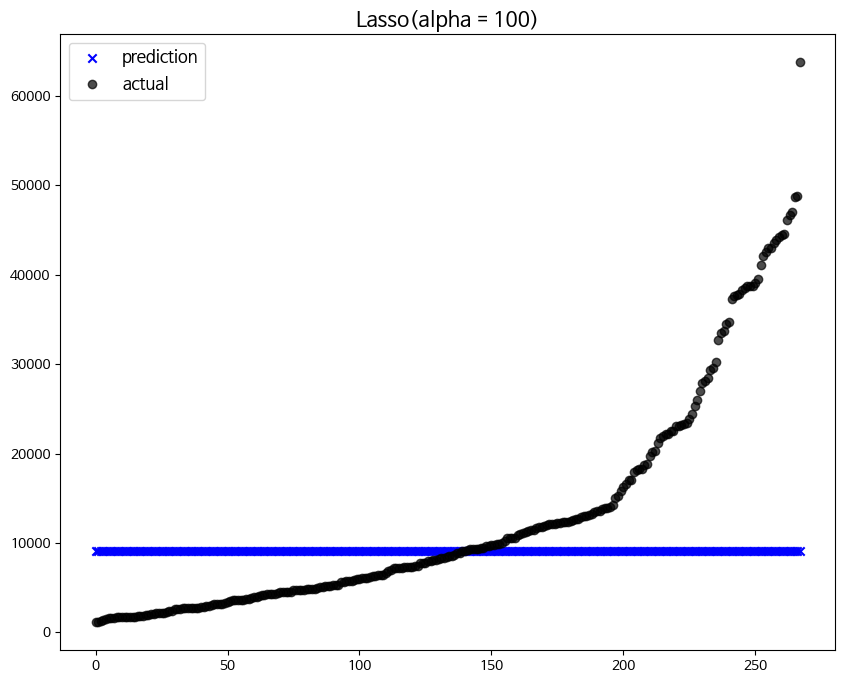

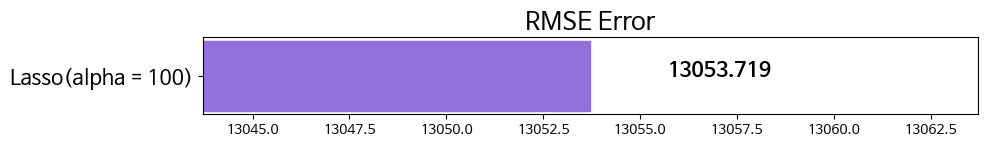


                model         rmse
0  Lasso(alpha = 100)  13053.71935


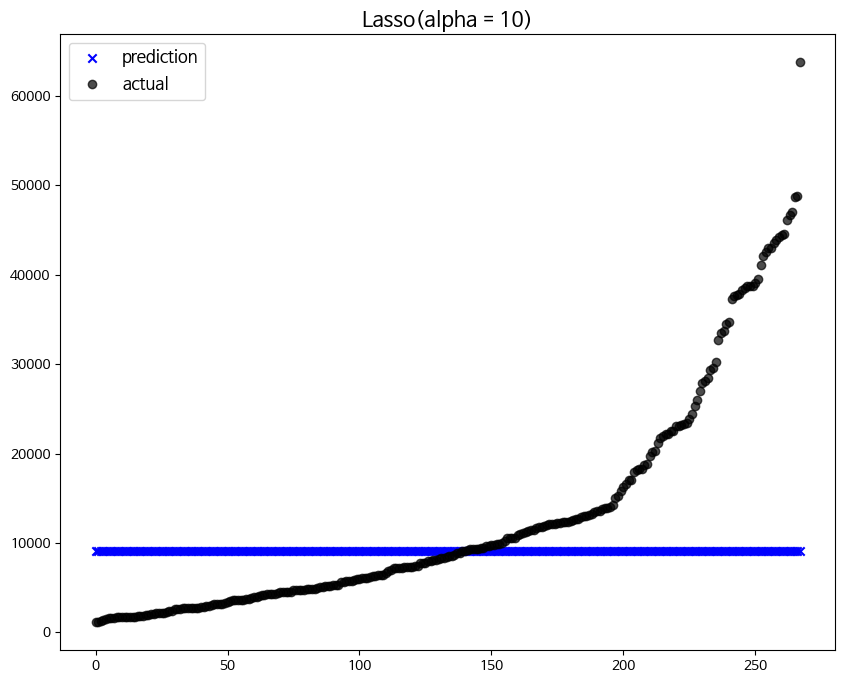

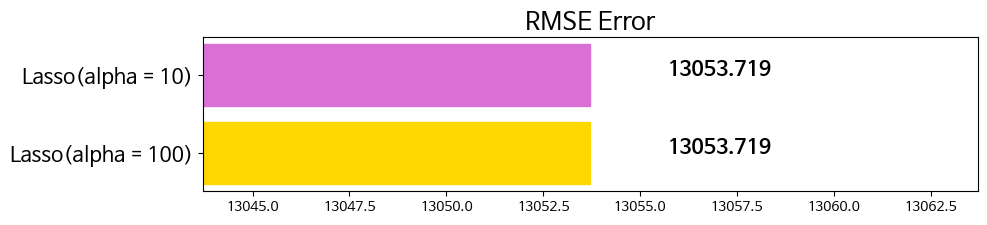


                model         rmse
0  Lasso(alpha = 100)  13053.71935
1   Lasso(alpha = 10)  13053.71935


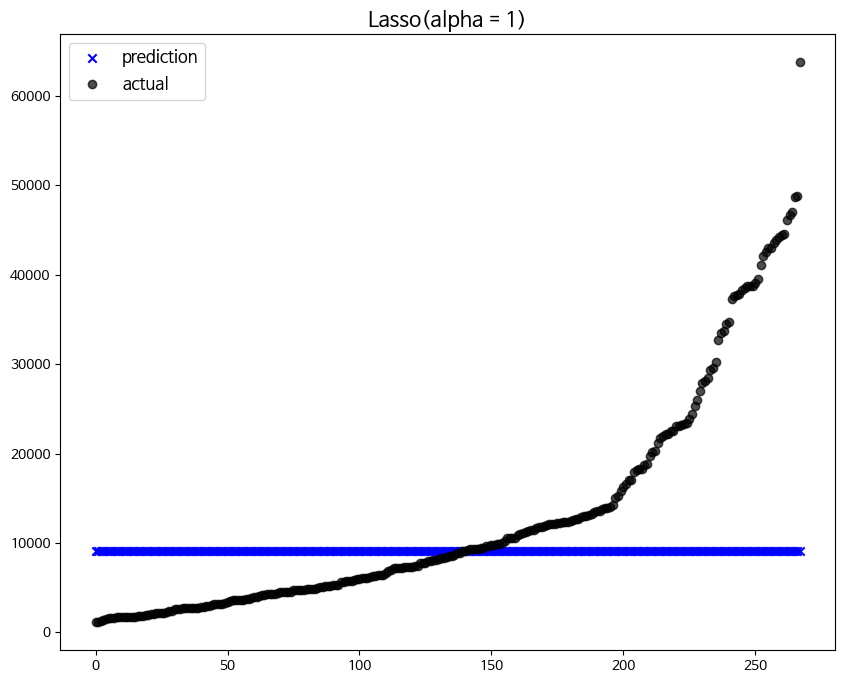

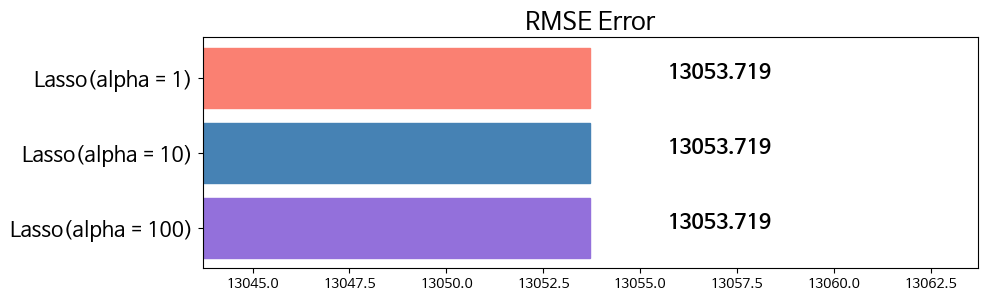


                model         rmse
0  Lasso(alpha = 100)  13053.71935
1   Lasso(alpha = 10)  13053.71935
2    Lasso(alpha = 1)  13053.71935


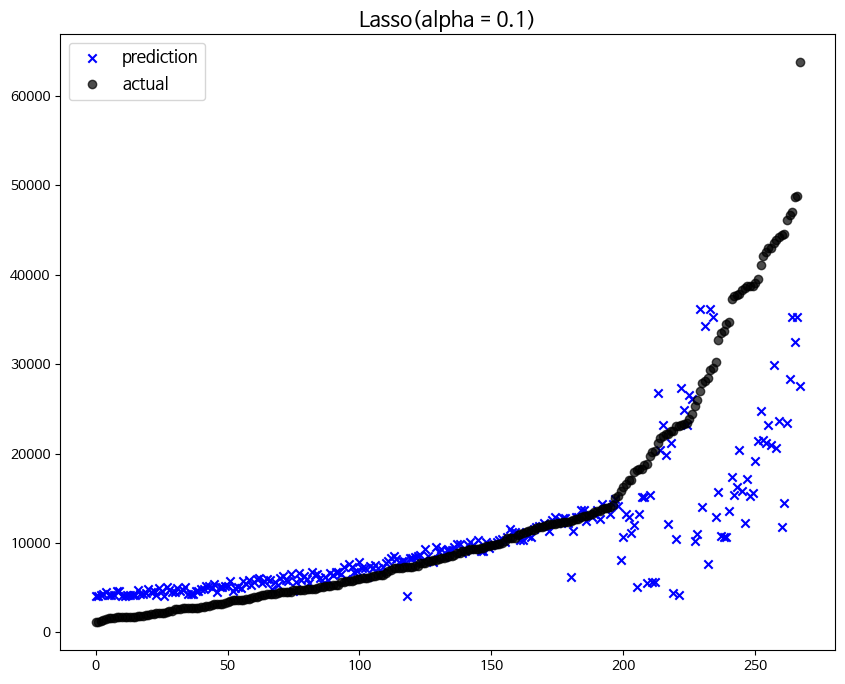

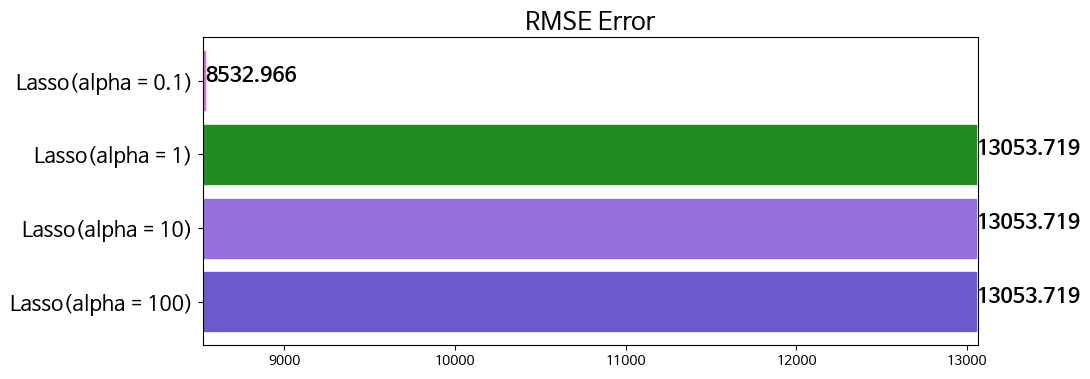


                model          rmse
0  Lasso(alpha = 100)  13053.719350
1   Lasso(alpha = 10)  13053.719350
2    Lasso(alpha = 1)  13053.719350
3  Lasso(alpha = 0.1)   8532.965955


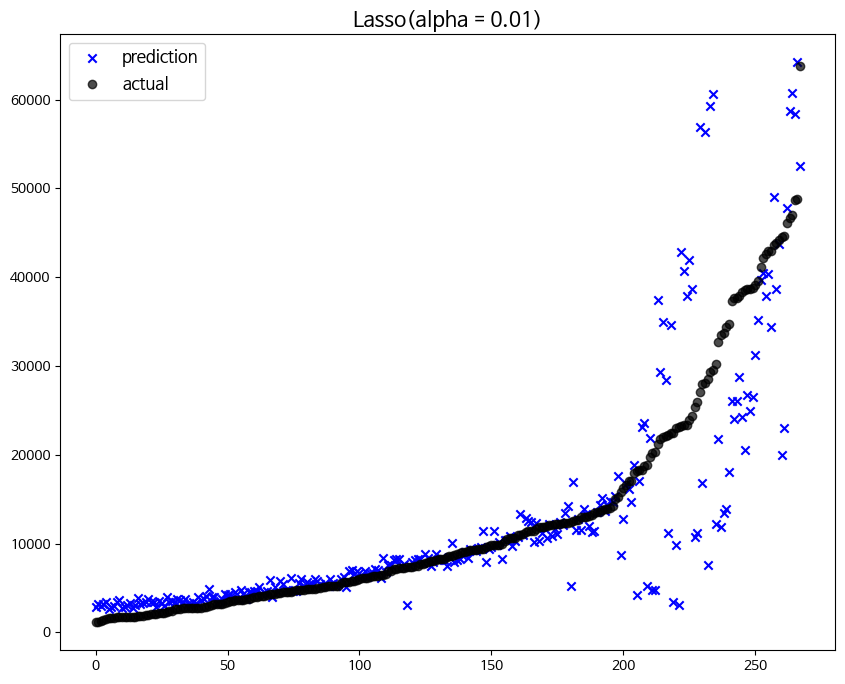

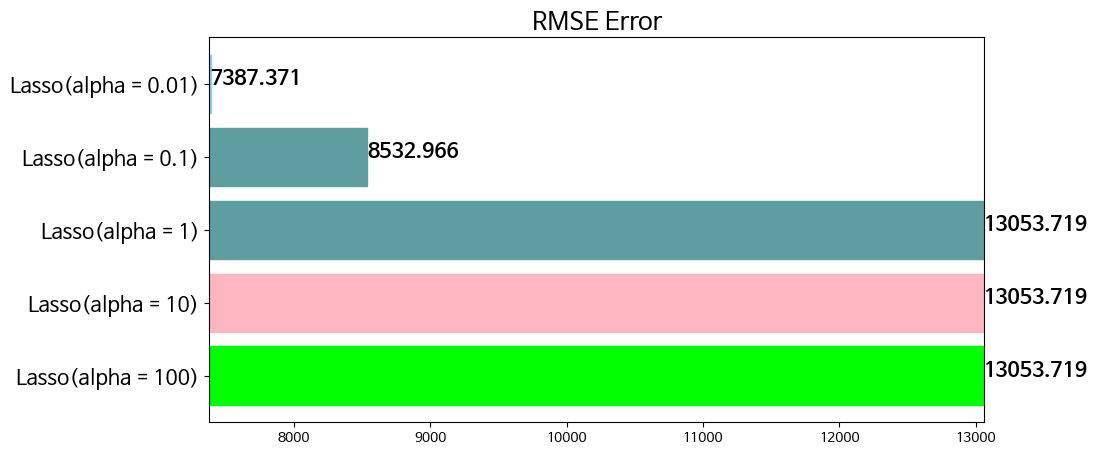


                 model          rmse
0   Lasso(alpha = 100)  13053.719350
1    Lasso(alpha = 10)  13053.719350
2     Lasso(alpha = 1)  13053.719350
3   Lasso(alpha = 0.1)   8532.965955
4  Lasso(alpha = 0.01)   7387.371426


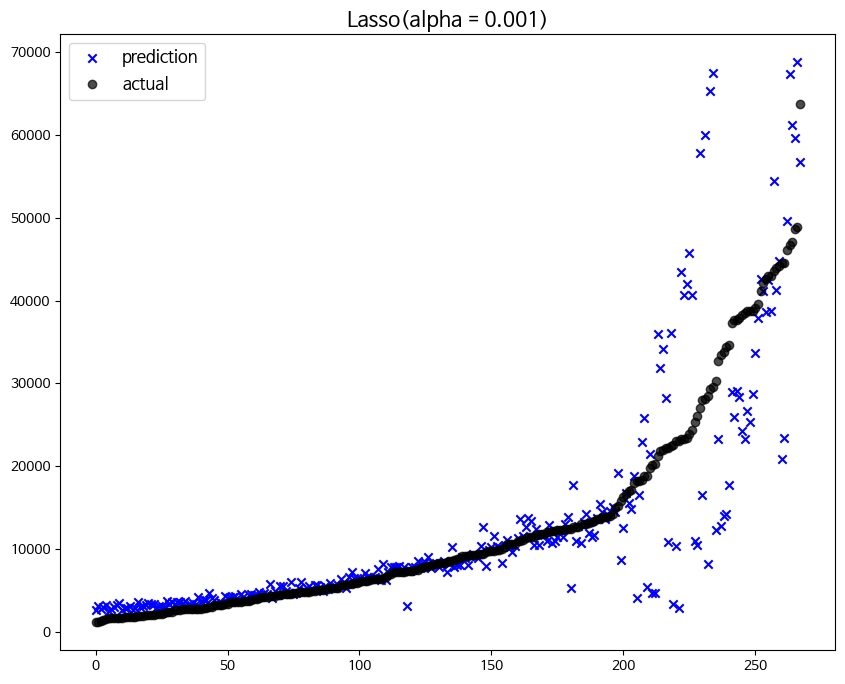

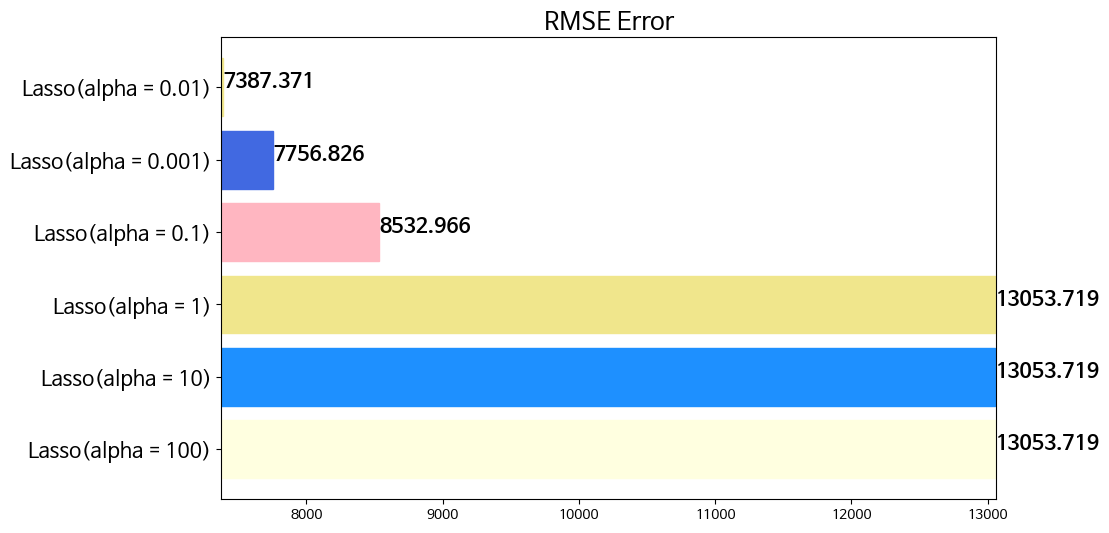


                  model          rmse
0    Lasso(alpha = 100)  13053.719350
1     Lasso(alpha = 10)  13053.719350
2      Lasso(alpha = 1)  13053.719350
3    Lasso(alpha = 0.1)   8532.965955
4  Lasso(alpha = 0.001)   7756.826148
5   Lasso(alpha = 0.01)   7387.371426


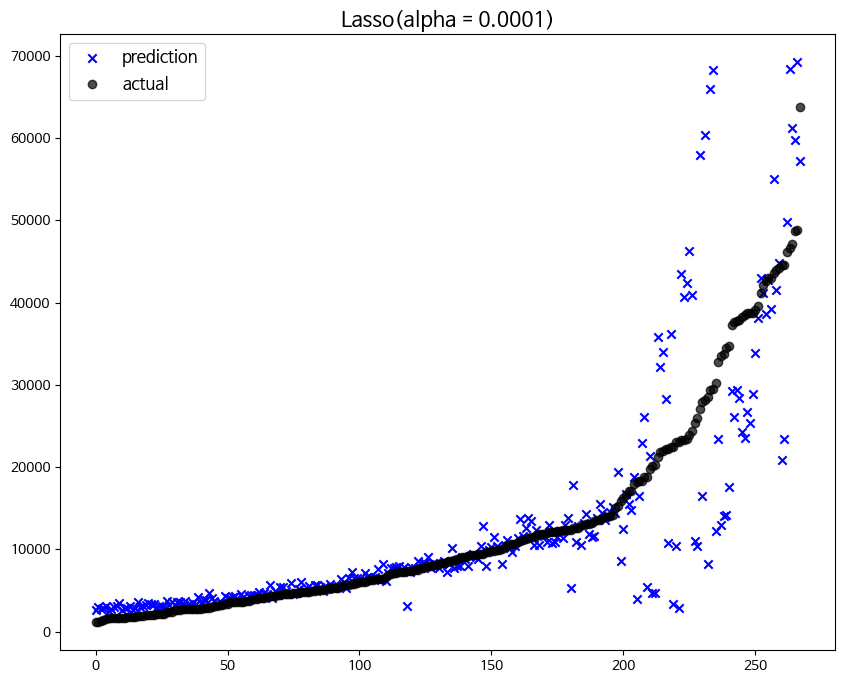

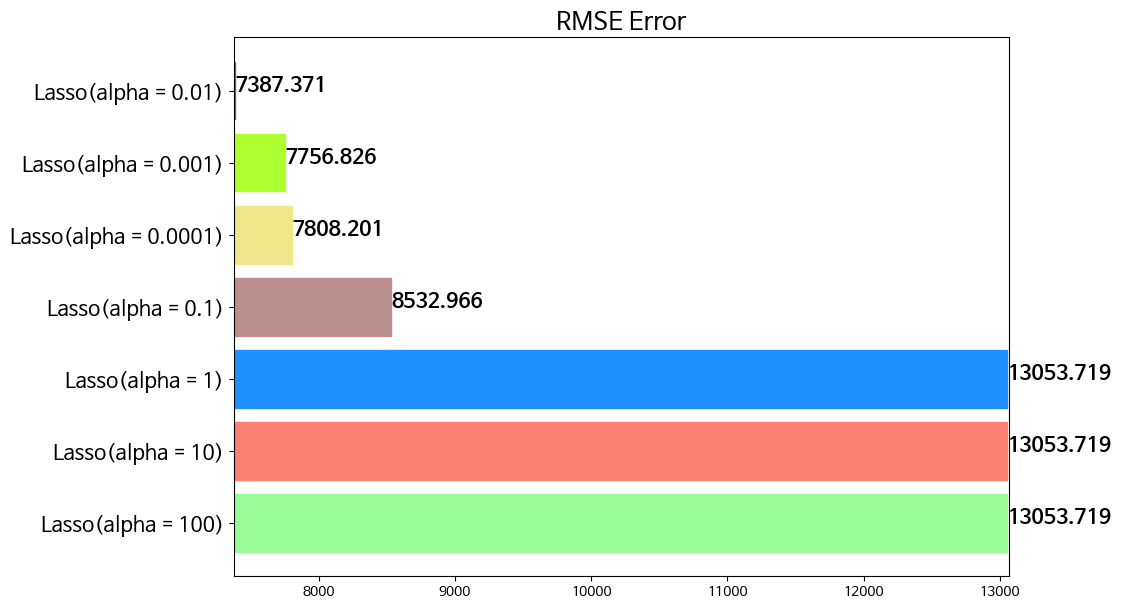


                   model          rmse
0     Lasso(alpha = 100)  13053.719350
1      Lasso(alpha = 10)  13053.719350
2       Lasso(alpha = 1)  13053.719350
3     Lasso(alpha = 0.1)   8532.965955
4  Lasso(alpha = 0.0001)   7808.200534
5   Lasso(alpha = 0.001)   7756.826148
6    Lasso(alpha = 0.01)   7387.371426


In [17]:
my_predictions = {}  # 결과를 저장할 딕셔너리

for alpha in alphas:
  lasso = Lasso(alpha = alpha)
  lasso.fit(X_train,y_train)
  pred = lasso.predict(X_test)
  pred = np.expm1(pred)
  model_eval('Lasso(alpha = {})'.format(alpha),pred,y_test)
  print("="*50)

- Lasso(alpha = 0.01) 모델이 가장 적절해 보인다.

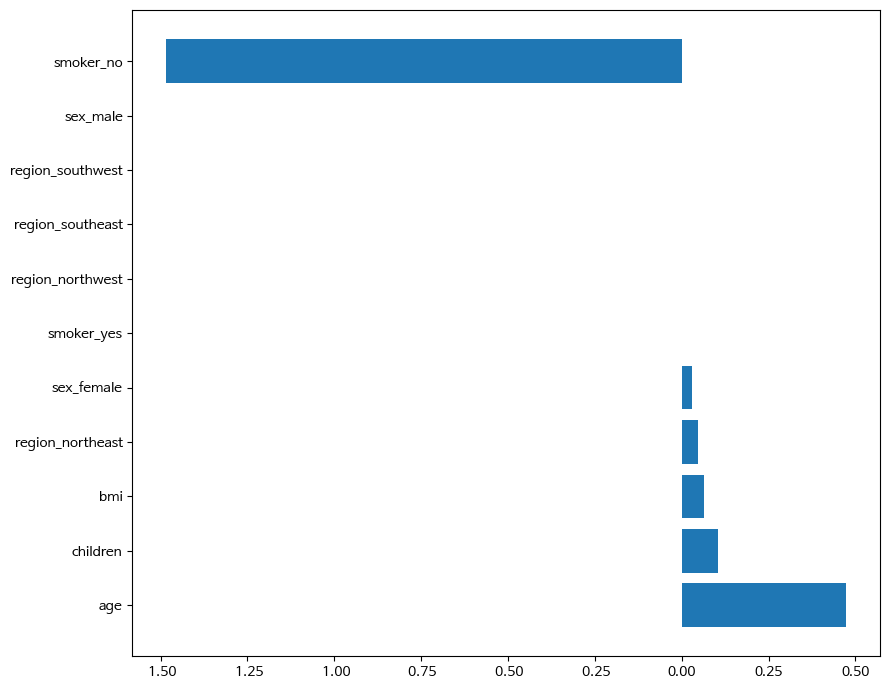

In [23]:
lasso_001 = Lasso(alpha = 0.01)
lasso_001.fit(X_train,y_train)

# 피처 중요도 시각화
plot_coef(X_train.columns,lasso_001.coef_)

- 흡연 여부가 치료 비용에 큰 영향을 미침을 짐작할 수 있다.

## **4-2. 릿지(Ridge)**

In [24]:
from sklearn.linear_model import Ridge

In [25]:
alphas = [100,10,1,0.1,0.01,0.001,0.0001] # 규제 강도

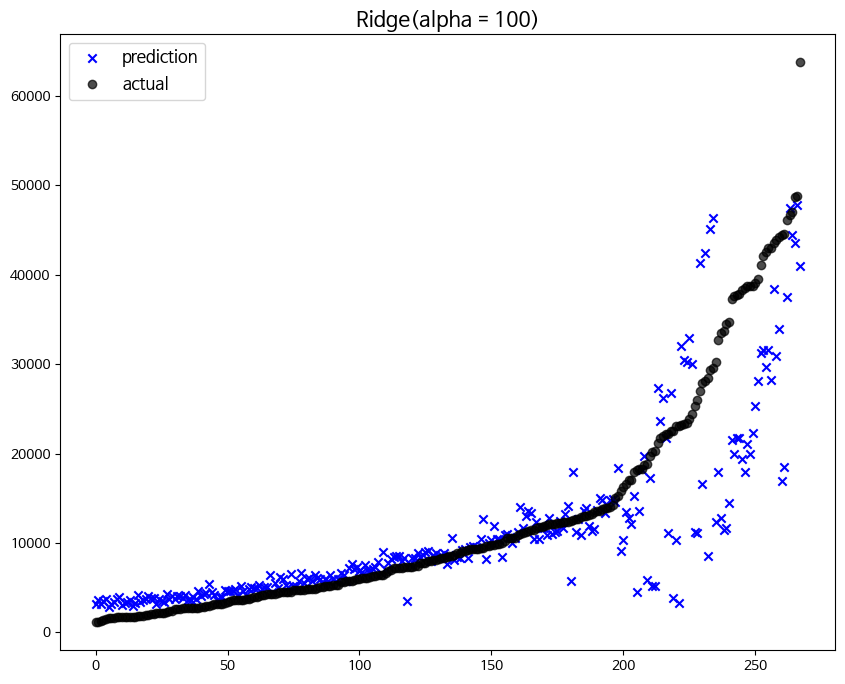

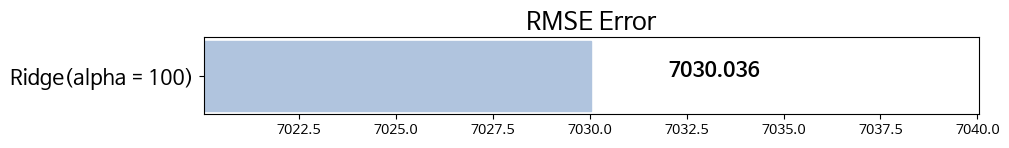


                model         rmse
0  Ridge(alpha = 100)  7030.035998


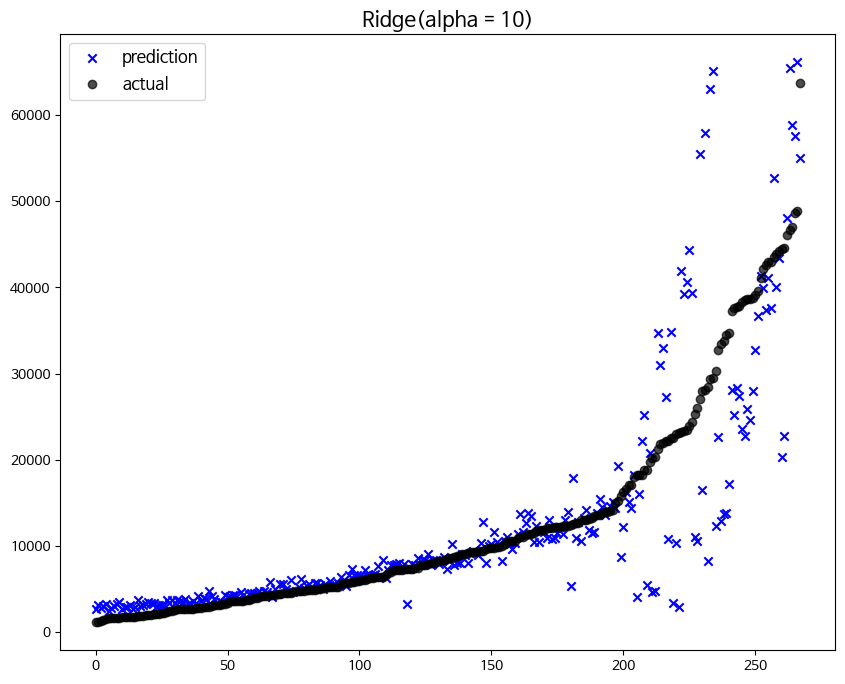

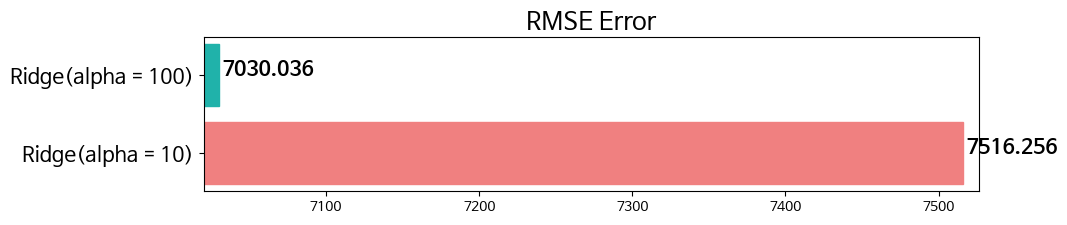


                model         rmse
0   Ridge(alpha = 10)  7516.255673
1  Ridge(alpha = 100)  7030.035998


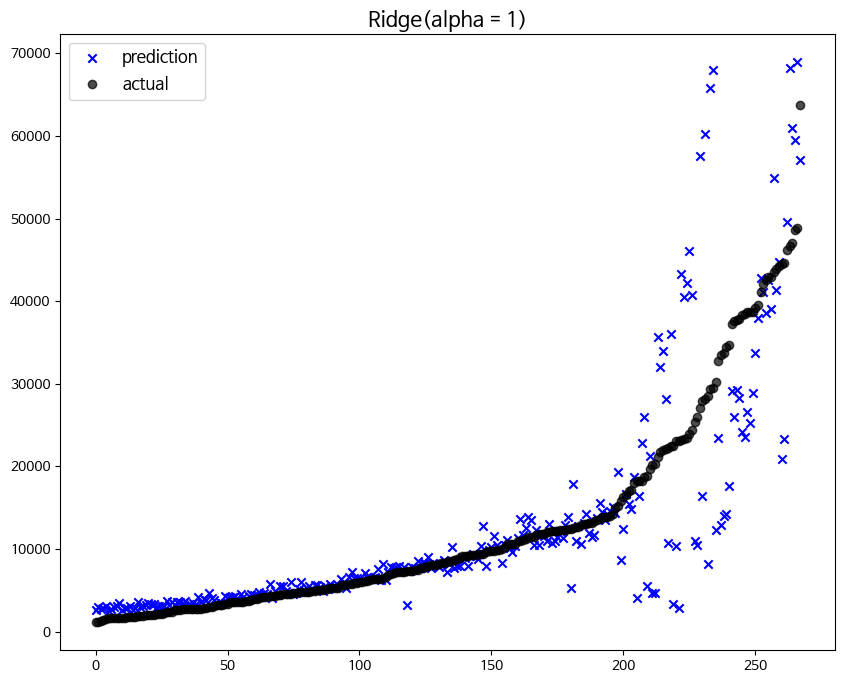

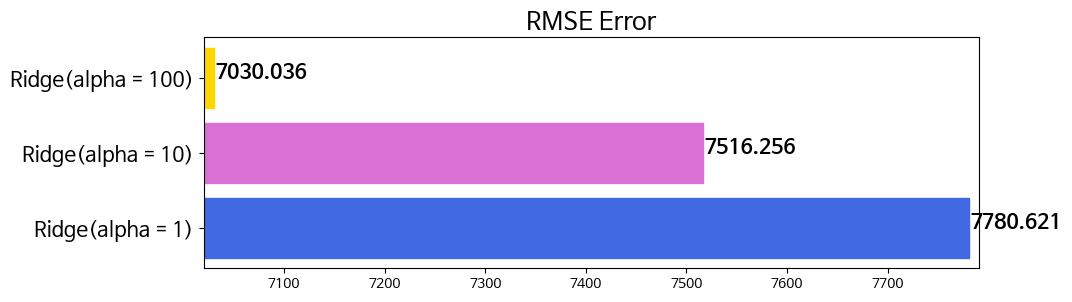


                model         rmse
0    Ridge(alpha = 1)  7780.621059
1   Ridge(alpha = 10)  7516.255673
2  Ridge(alpha = 100)  7030.035998


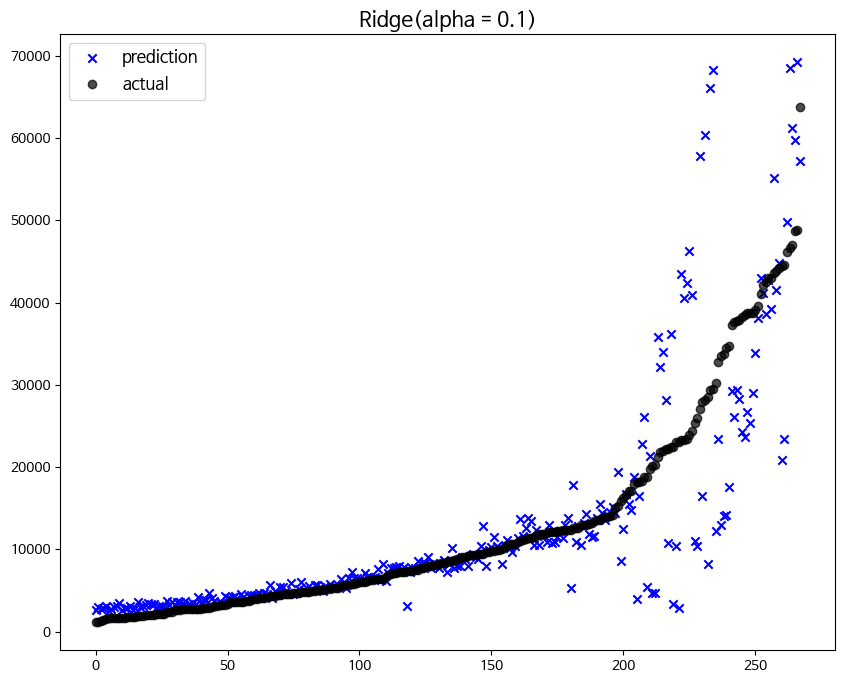

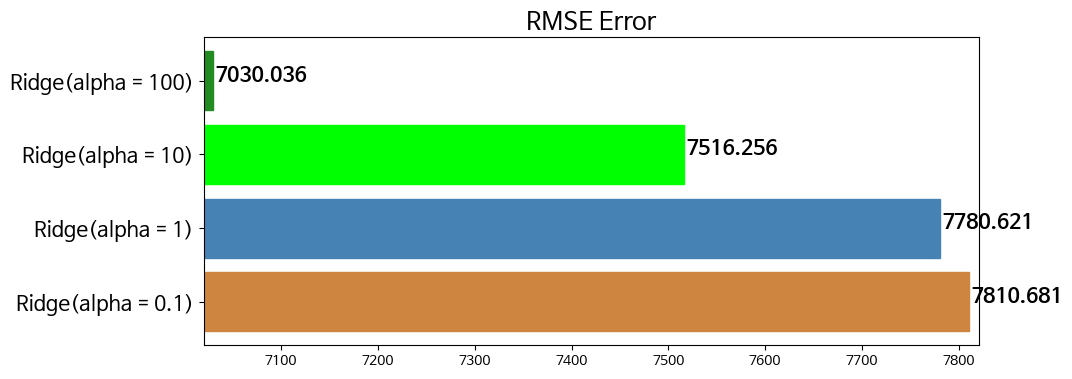


                model         rmse
0  Ridge(alpha = 0.1)  7810.681206
1    Ridge(alpha = 1)  7780.621059
2   Ridge(alpha = 10)  7516.255673
3  Ridge(alpha = 100)  7030.035998


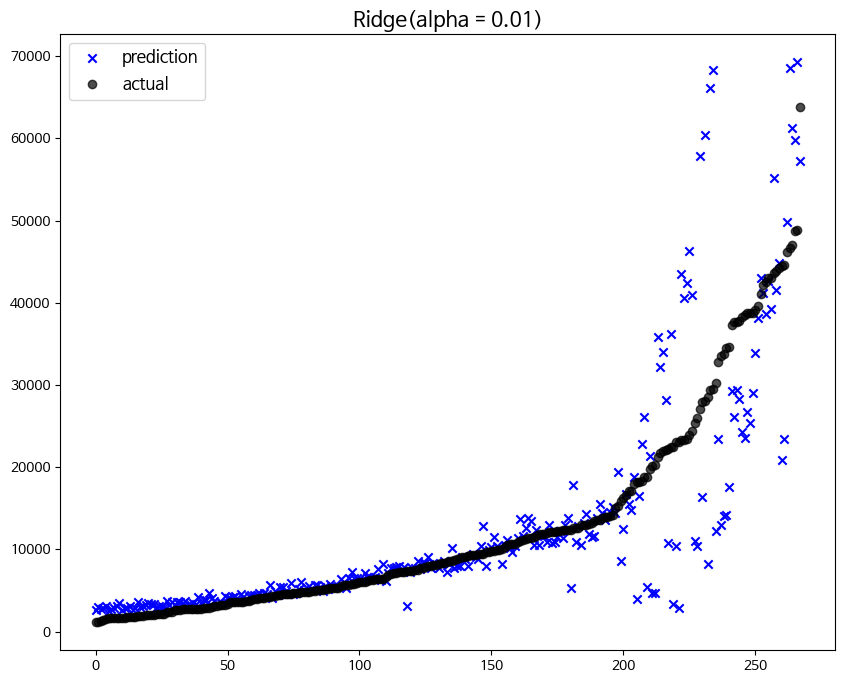

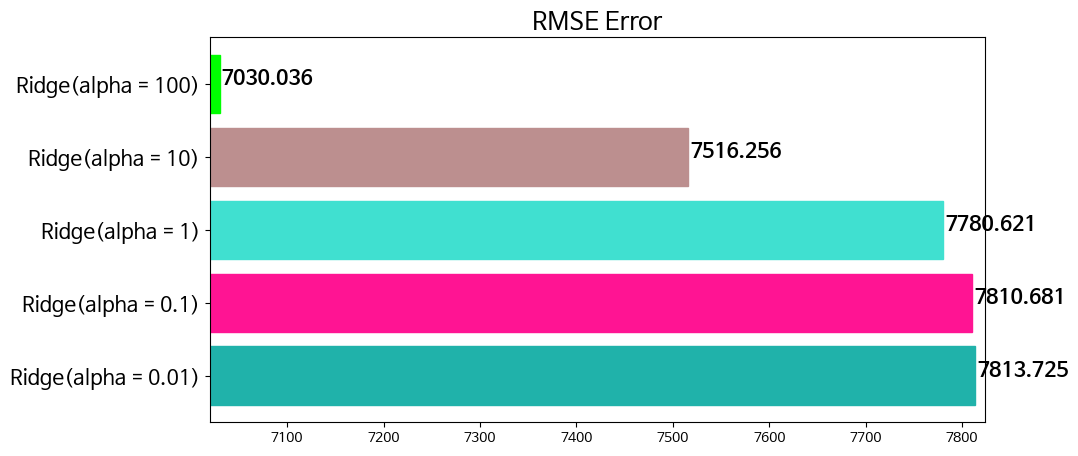


                 model         rmse
0  Ridge(alpha = 0.01)  7813.725357
1   Ridge(alpha = 0.1)  7810.681206
2     Ridge(alpha = 1)  7780.621059
3    Ridge(alpha = 10)  7516.255673
4   Ridge(alpha = 100)  7030.035998


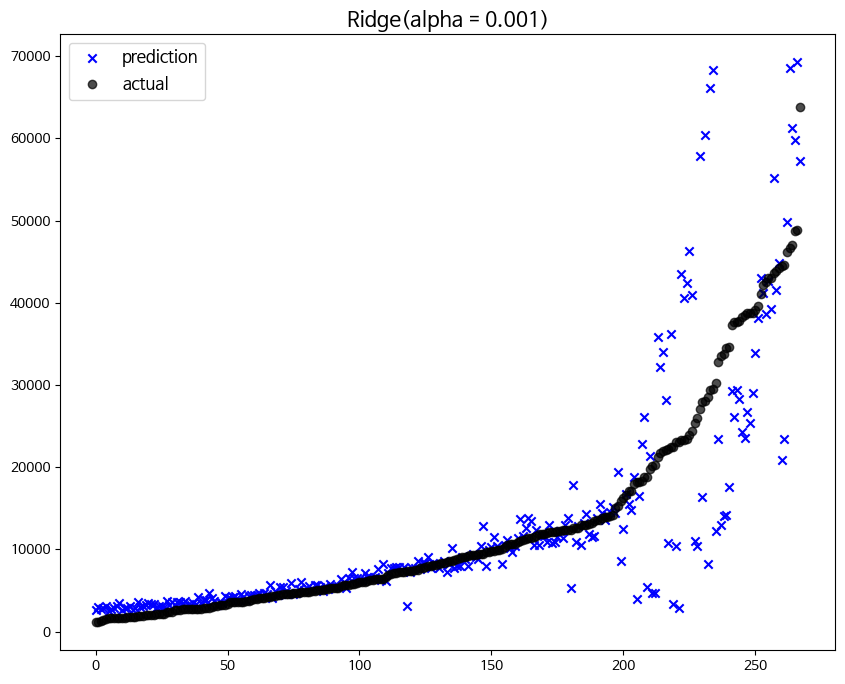

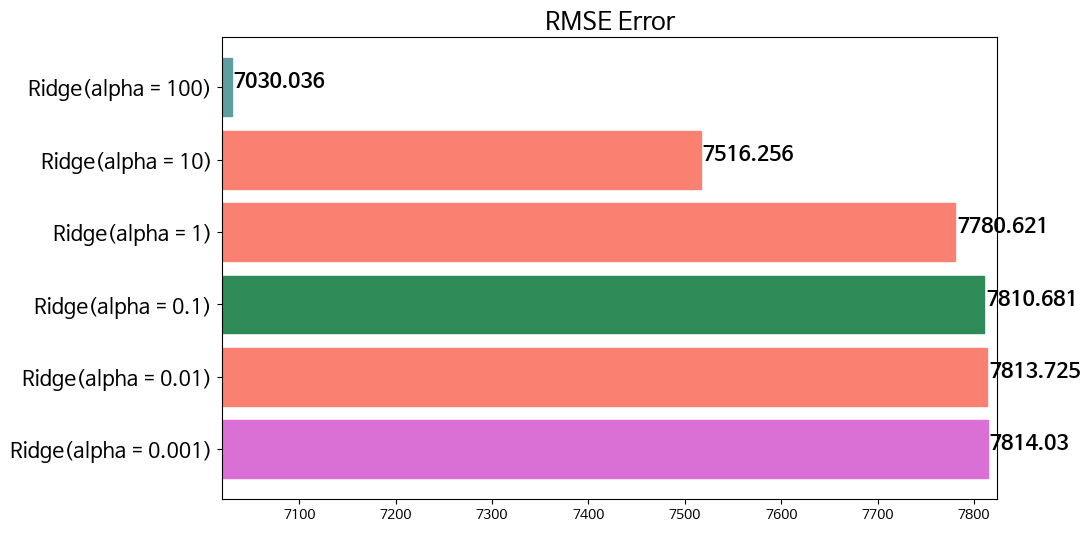


                  model         rmse
0  Ridge(alpha = 0.001)  7814.030155
1   Ridge(alpha = 0.01)  7813.725357
2    Ridge(alpha = 0.1)  7810.681206
3      Ridge(alpha = 1)  7780.621059
4     Ridge(alpha = 10)  7516.255673
5    Ridge(alpha = 100)  7030.035998


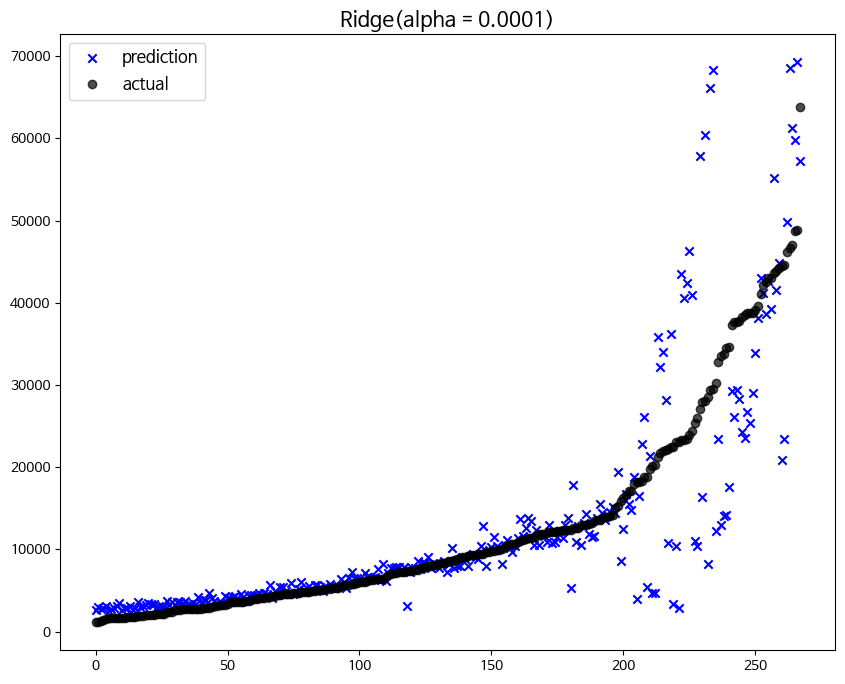

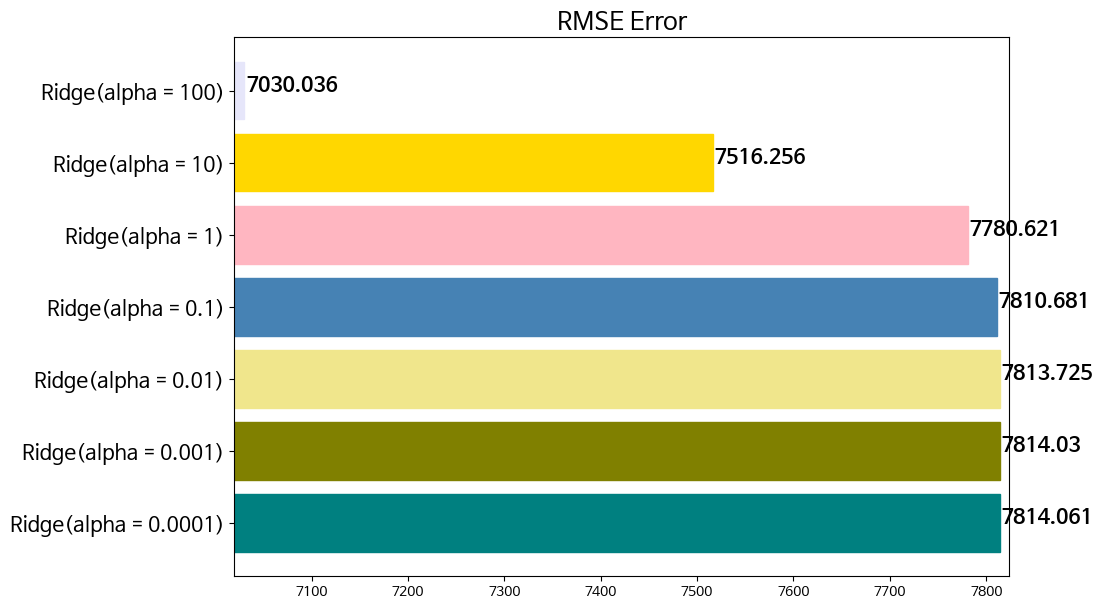


                   model         rmse
0  Ridge(alpha = 0.0001)  7814.060639
1   Ridge(alpha = 0.001)  7814.030155
2    Ridge(alpha = 0.01)  7813.725357
3     Ridge(alpha = 0.1)  7810.681206
4       Ridge(alpha = 1)  7780.621059
5      Ridge(alpha = 10)  7516.255673
6     Ridge(alpha = 100)  7030.035998


In [27]:
my_predictions = {}  # 결과를 저장할 딕셔너리

for alpha in alphas:
  ridge = Ridge(alpha = alpha)
  ridge.fit(X_train,y_train)
  pred = ridge.predict(X_test)
  pred = np.expm1(pred)
  model_eval('Ridge(alpha = {})'.format(alpha),pred,y_test)
  print("="*50)

-  Ridge(alpha = 100) 모델이 가장 적절해 보인다.

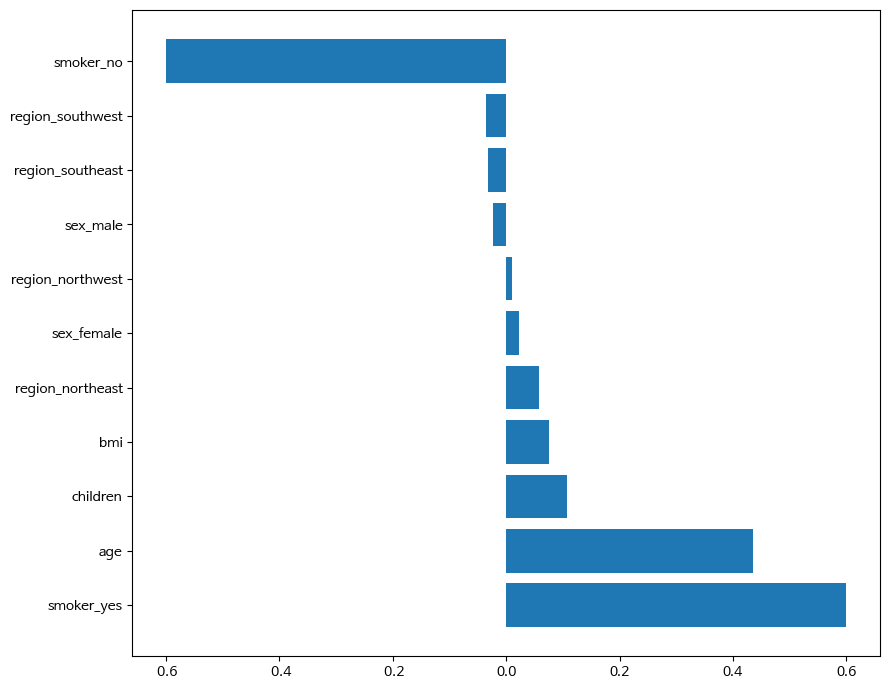

In [28]:
ridge_100 = Ridge(alpha = 100)
ridge_100.fit(X_train,y_train)

# 피처 중요도 시각화
plot_coef(X_train.columns,ridge_100.coef_)

- 흡연 여부가 치료 비용에 큰 영향을 미침을 짐작할 수 있다.
- 라쏘와 다르게 모든 변수를 유지하려는 모습을 볼 수 있다.